[ 130.   200.     3.     5.     1.5    1. ]


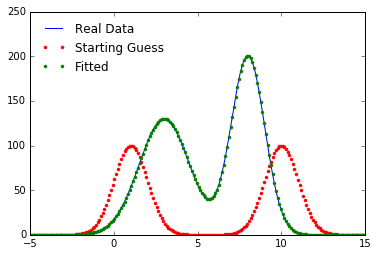

In [41]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

######################################
# Setting up test data
def norm(x, scale, mean, sd):
    norm = []
    for i in range(x.size):
        norm += [scale * np.exp(-0.5*((x[i]-mean)/sd)**2.0)]
    
    return np.array(norm)

scale1, scale2 = 130, 200
mean1, mean2 = 3, 8
std1, std2 = 1.5, 1 

x = np.linspace(-5, 15, 200)
y_real = norm(x, scale1, mean1, std1) + norm(x, scale2, mean2, std2)



######################################
# Solving
s1, s2, m, dm, sd1, sd2 = 100, 100, 1, 9, 1, 1
p = [s1, s2, m, dm, sd1, sd2] # Initial guesses for leastsq
y_init = norm(x, s1, m, sd1) + norm(x, s2, m + dm, sd2) # For final comparison plot

def res(p, y, x):
    s1, s2, m, dm, sd1, sd2 = p
    m1 = m
    m2 = m1 + dm
    y_fit = norm(x, s1, m1, sd1) + norm(x, s2, m2, sd2)
    err = y - y_fit
    return err

plsq, pcov = leastsq(res, p, args = (y_real, x))

y_est = norm(x, plsq[0], plsq[2], plsq[4]) + norm(x, plsq[1], plsq[2] + plsq[3], plsq[5])
print plsq

plt.plot(x, y_real, label='Real Data')
plt.plot(x, y_init, 'r.', label='Starting Guess')
plt.plot(x, y_est, 'g.', label='Fitted')
plt.legend(loc=0, frameon=0)
plt.show()

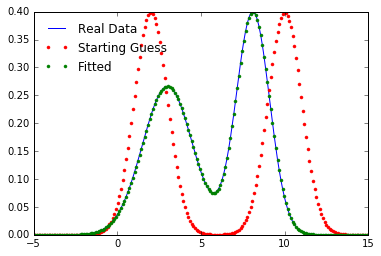

In [20]:
######################################
# Setting up test data
def norm(x, mean, sd):
    norm = []
    for i in range(x.size):
        norm += [1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x[i] - mean)**2/(2*sd**2))]
    return np.array(norm)

mean1, mean2 = 3.0, 8.1
std1, std2 = 1.5, 1.0 

x = np.linspace(-5.0, 15.0, 200)
y_real = norm(x, mean1, std1) + norm(x, mean2, std2)

######################################
# Solving
m, dm, sd1, sd2 = [2, 8, 1, 1]
p = [m, dm, sd1, sd2] # Initial guesses for leastsq
y_init = norm(x, m, sd1) + norm(x, m + dm, sd2) # For final comparison plot

def res(p, y, x):
    m, dm, sd1, sd2 = p
    m1 = m
    m2 = m1 + dm
    y_fit = norm(x, m1, sd1) + norm(x, m2, sd2)
    err = y - y_fit
    return err

plsq, pcov = leastsq(res, p, args = (y_real, x))

y_est = norm(x, plsq[0], plsq[2]) + norm(x, plsq[0] + plsq[1], plsq[3])

plt.plot(x, y_real, label='Real Data')
plt.plot(x, y_init, 'r.', label='Starting Guess')
plt.plot(x, y_est, 'g.', label='Fitted')
plt.legend(loc=0, frameon=0)
plt.show()